# Cas Kaggle Fake and Real news

##### Nom: Maria Graupera Rodón

#### Niu: 1570127

# Imports

In [1]:
#per treure warnings
from warnings import simplefilter 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings('always', category = DeprecationWarning)

# data analysis and wrangling
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')
np.seterr(all="ignore")
import random as rnd
import time
import spacy

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import svm, datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from scipy import stats

/home/maria/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/home/maria/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')


# Funcions

In [2]:
def apply_models(particions,X,y,ret=False):

    for part in particions:
        x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)

        #Creem el regresor logístic
        logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
        # l'entrenem
        logireg.fit(x_t, y_t)
        problr = logireg.predict_proba(x_v)
        print ("Correct classification Logistic        ", part, "% of the data: ", logireg.score(x_v, y_v))

        
        #Creem el svm
        svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
        # l'entrenem 
        svc.fit(x_t, y_t)
        probsvc = svc.predict_proba(x_v)
        print ("Correct classification SVM             ", part, "% of the data: ", svc.score(x_v, y_v))

        
        #Creem el svm lineal
        svcl = svm.SVC(C=10.0, kernel='linear', gamma=0.9, probability=True)
        # l'entrenem 
        svcl.fit(x_t, y_t)
        probsvcl = svcl.predict_proba(x_v)
        print ("Correct classification SVML            ", part, "% of the data: ", svcl.score(x_v, y_v))

        
        #Creem el svm poly deg=3
        svcp = svm.SVC(C=10.0, kernel='poly', gamma=0.9, probability=True)
        # l'entrenem 
        svcp.fit(x_t, y_t)
        probsvcp = svcp.predict_proba(x_v)
        print ("Correct classification SVMP deg3       ", part, "% of the data: ", svcp.score(x_v, y_v))

        
        #Creem el svm poly deg=2
        svcp2 = svm.SVC(C=10.0, kernel='poly', degree=2, gamma=0.9, probability=True)
        # l'entrenem 
        svcp2.fit(x_t, y_t)
        probsvcp2 = svcp2.predict_proba(x_v)
        print ("Correct classification SVMP deg2       ", part, "% of the data: ", svcp2.score(x_v, y_v))


        #Creem el svm sigmoid
        svcs= svm.SVC(C=10.0, kernel='sigmoid', gamma=0.9, probability=True)
        # l'entrenem 
        svcs.fit(x_t, y_t)
        probsvcs = svcs.predict_proba(x_v)
        print ("Correct classification SVMS            ", part, "% of the data: ", svcs.score(x_v, y_v))


        #Creem random forests gini
        clf = RandomForestClassifier(max_depth=2, random_state=0)
        # l'entrenem 
        clf.fit(x_t, y_t)
        probclf = clf.predict_proba(x_v)
        print ("Correct classification RFC             ", part, "% of the data: ", clf.score(x_v, y_v))

        
        #Creem random forests entropy with n_e=1000 and md=5
        clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0,criterion="entropy")
        # l'entrenem 
        clfe.fit(x_t, y_t)
        probclfe = clfe.predict_proba(x_v)
        print ("Correct classification RFC etpy        ", part, "% of the data: ", clfe.score(x_v, y_v))


        #Creem KNN ball_tree
        KNNbt = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
        # l'entrenem 
        KNNbt.fit(x_t, y_t)
        probKNNbt = KNNbt.predict_proba(x_v)
        print ("Correct classification KNN BT          ", part, "% of the data: ", KNNbt.score(x_v, y_v))

        
        #Creem KNN kd_tree
        KNNkd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree")
        # l'entrenem 
        KNNkd.fit(x_t, y_t)
        probKNNkd = KNNkd.predict_proba(x_v)
        print ("Correct classification KNN KD          ", part, "% of the data: ", KNNkd.score(x_v, y_v))

        
        #Creem KNN brute
        KNNbrt = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
        # l'entrenem 
        KNNbrt.fit(x_t, y_t)
        probKNNbrt = KNNbrt.predict_proba(x_v)
        print ("Correct classification KNN BRT         ", part, "% of the data: ", KNNbrt.score(x_v, y_v))


        #Creem KNN ball_tree weights = distance
        KNNbtwd = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree",weights="distance")
        # l'entrenem 
        KNNbtwd.fit(x_t, y_t)
        probKNNbtwd = KNNbtwd.predict_proba(x_v)
        print ("Correct classification KNN BT wd=d     ", part, "% of the data: ", KNNbtwd.score(x_v, y_v))

        
        #Creem KNN kd_tree weights = distance
        KNNkdwd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="distance")
        # l'entrenem 
        KNNkdwd.fit(x_t, y_t)
        probKNNkdwd = KNNkdwd.predict_proba(x_v)
        print ("Correct classification KNN KD wd=d     ", part, "% of the data: ", KNNkdwd.score(x_v, y_v))

        
        #Creem KNN brute weights = distance
        KNNbrtwd = KNeighborsClassifier(n_neighbors=3,algorithm="brute",weights="distance")
        # l'entrenem 
        KNNbrtwd.fit(x_t, y_t)
        probKNNbrtwd = KNNbrtwd.predict_proba(x_v)
        print ("Correct classification KNN BRT wd=d    ", part, "% of the data: ", KNNbrtwd.score(x_v, y_v))    

        print("\n")
    if ret:
        return [problr,probsvc,probsvcl,probsvcp,probsvcp2,probsvcs,probclf,probclfe,probKNNbt,probKNNkd,probKNNbrt,probKNNbtwd,probKNNkdwd,probKNNbrtwd],x_t, x_v, y_t, y_v

In [3]:
def compute_precision_recall(probs):
    # Compute Precision-Recall and plot curve
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="lower left")

def compute_ROC(probs):
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()

In [4]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(X,y,col,C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    # Take the first two features. We could avoid this by using a two-dim dataset
    X=X
    y=y
    col=col

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(col[0])
        ax.set_ylabel(col[1])
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

In [5]:
def visualize_confusion_matrix(y_pred, y_real):
    # mostra la matriu de confusió
    cm = confusion_matrix(y_real, y_pred)
    plt.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot = True, fmt = 'g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Exploració de les dades

In [6]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

Afegim un quart atribut label el qual ens permetrà saber si la noticia és falsa o no ho és.

In [7]:
fake['Label'] = "Fake"
true['Label'] = "True"

Mostrem el atributs que té les nostres bases de dades.

In [8]:
print(fake.columns.values)
print(true.columns.values)

['title' 'text' 'subject' 'date' 'Label']
['title' 'text' 'subject' 'date' 'Label']


Mostrem les 5 primeres linies de les nostres bases de dades.

In [9]:
true.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [10]:
fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


Juntem les dos bases de dades en una de sola.

In [11]:
df = pd.concat([fake, true], axis=0)
df.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


Mostrem la informació de la base de dades.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


Mirem si falten dades.

In [13]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

En aquest cas ens interesen els atributs text i label alhora de fer el classificador.

In [14]:
df = df.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,Label
0,Donald Trump just couldn t wish all Americans ...,Fake
1,House Intelligence Committee Chairman Devin Nu...,Fake
2,"On Friday, it was revealed that former Milwauk...",Fake
3,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis used his annual Christmas Day mes...,Fake


In [15]:
df['Label'].value_counts()

Fake    23481
True    21417
Name: Label, dtype: int64

Convertim l'atribut label que és un object a int.

In [16]:
df['label'] = df['Label'].map({'Fake':0, 'True':1})
df.head()

,text,Label,label
0,Donald Trump just couldn t wish all Americans ...,Fake,0
1,House Intelligence Committee Chairman Devin Nu...,Fake,0
2,"On Friday, it was revealed that former Milwauk...",Fake,0
3,"On Christmas day, Donald Trump announced that ...",Fake,0
4,Pope Francis used his annual Christmas Day mes...,Fake,0


Apliquem el mètode nlp per tal de transformar un text a un vector de floats i ho guardem en un fitxer .csv per tal de nomes haver-ho d'executar un cop ja que  triga 1 hora en executar-se aproximadament.

In [17]:
nlp = spacy.load('en_core_web_lg')

In [18]:
# Triga aproximadament 1 hora en executar-se
df['text_vector'] = df['text'].apply(lambda x: nlp(x).vector)
df.head()

,text,Label,label,text_vector
0,Donald Trump just couldn t wish all Americans ...,Fake,0,"[-1.6387042, -0.027837504, -1.6619873, -0.2017..."
1,House Intelligence Committee Chairman Devin Nu...,Fake,0,"[-1.9558355, 0.5587237, -2.036446, 0.40390933,..."
2,"On Friday, it was revealed that former Milwauk...",Fake,0,"[-1.9058484, -0.04223674, -1.7389339, -0.02855..."
3,"On Christmas day, Donald Trump announced that ...",Fake,0,"[-1.6265213, 0.14619705, -0.5877981, 0.0992525..."
4,Pope Francis used his annual Christmas Day mes...,Fake,0,"[-2.1327376, 1.1017615, -2.4795847, -0.0065187..."


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         44898 non-null  object
 1   Label        44898 non-null  object
 2   label        44898 non-null  int64 
 3   text_vector  44898 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


Separem la base de dades en train i test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df['text_vector'],df['label'], test_size = 0.3, random_state = 10)

In [23]:
X_train_convert = np.stack(X_train)
X_test_convert = np.stack(X_test)

In [24]:
from sklearn.naive_bayes import MultinomialNB

scaler = MinMaxScaler()
X_train_convert_scaled = scaler.fit_transform(X_train_convert)
X_test_convert_scaled = scaler.transform(X_test_convert)

clf = MultinomialNB()
clf.fit(X_train_convert_scaled, y_train)

MultinomialNB()

In [25]:
from sklearn.metrics import classification_report


y_prediction = clf.predict(X_test_convert_scaled)

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7037
           1       0.84      0.90      0.87      6433

    accuracy                           0.87     13470
   macro avg       0.87      0.87      0.87     13470
weighted avg       0.87      0.87      0.87     13470



In [26]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_train_convert_scaled, y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
y_prediction_tree = clf_tree.predict(X_test_convert_scaled)
print(classification_report(y_test, y_prediction_tree))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7037
           1       0.95      0.92      0.94      6433

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



Gràfic del numero de noticies falses i certes hi ha

<AxesSubplot:xlabel='label', ylabel='count'>

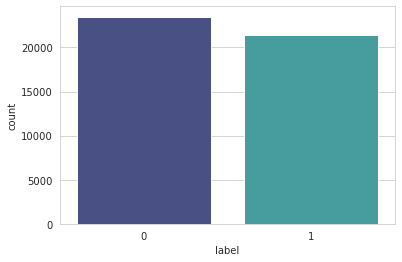

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='label',data=df,palette='mako')

# Model selection

In [29]:
particions = [0.5, 0.7, 0.8]
probs_list,x_t, x_v, y_t, y_v=apply_models(particions,X_train_convert_scaled,y_train,ret=True)

Correct classification Logistic         0.5 % of the data:  0.9828178694158075
Correct classification SVM              0.5 % of the data:  0.9926180476008655
Correct classification SVML             0.5 % of the data:  0.988863433880616
Correct classification SVMP deg3        0.5 % of the data:  0.9876543209876543
Correct classification SVMP deg2        0.5 % of the data:  0.9877179585083365
Correct classification SVMS             0.5 % of the data:  0.5211276568664884
Correct classification RFC              0.5 % of the data:  0.8965890288914344
Correct classification RFC etpy         0.5 % of the data:  0.935153366424844
Correct classification KNN BT           0.5 % of the data:  0.9634084256077383
Correct classification KNN KD           0.5 % of the data:  0.9634084256077383
Correct classification KNN BRT          0.5 % of the data:  0.9634084256077383
Correct classification KNN BT wd=d      0.5 % of the data:  0.9670994018073056
Correct classification KNN KD wd=d      0.5 % of the d

# Analisi de les mètriques

problr
probsvc
probsvcl
probsvcp
probsvcp2
probsvcs
probclf
probclfe
probKNNbt
probKNNkd
probKNNbrt
probKNNbtwd
probKNNkdwd
probKNNbrtwd


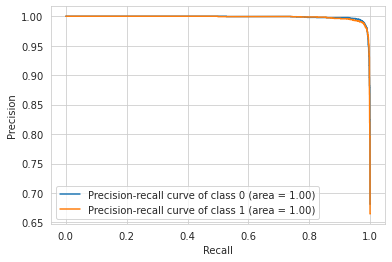

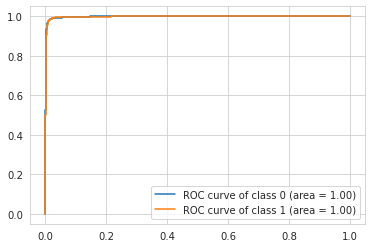

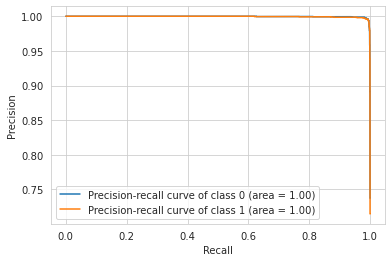

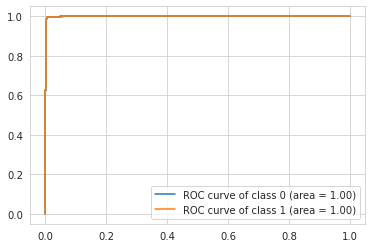

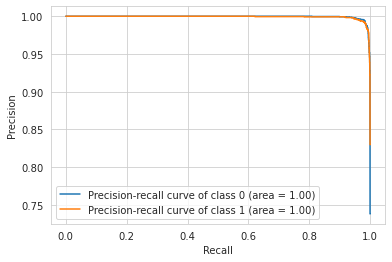

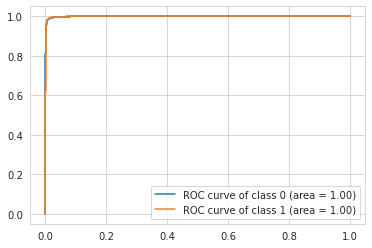

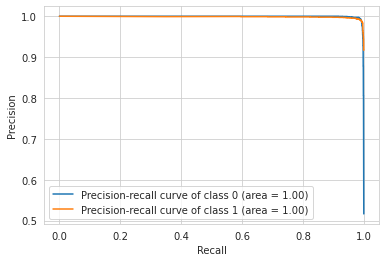

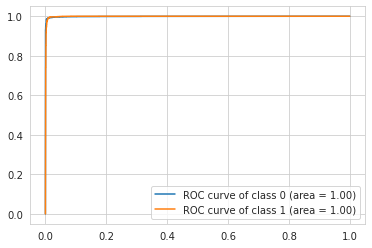

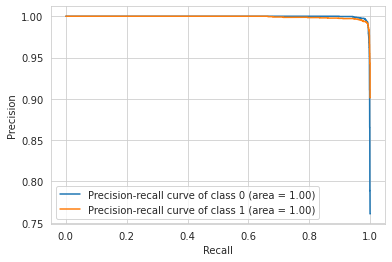

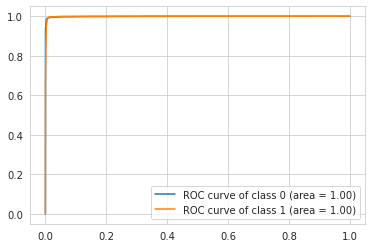

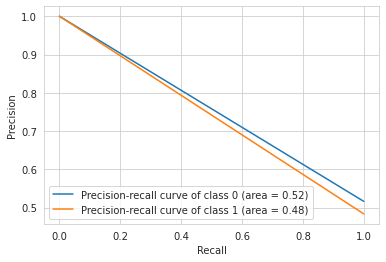

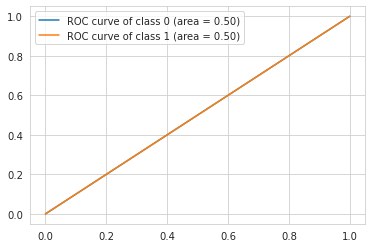

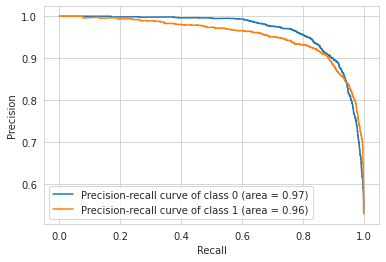

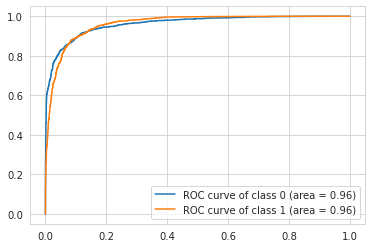

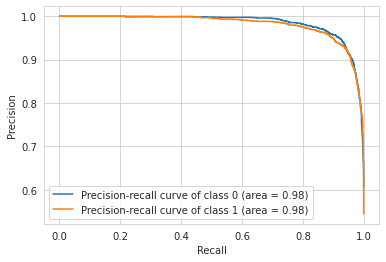

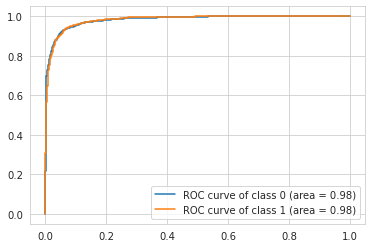

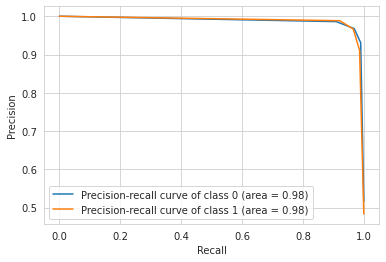

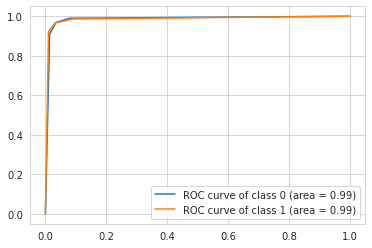

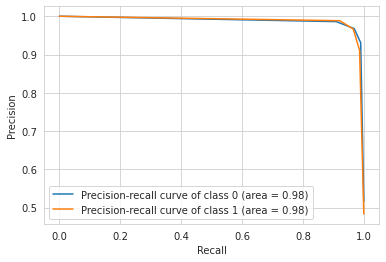

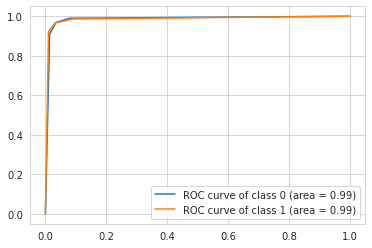

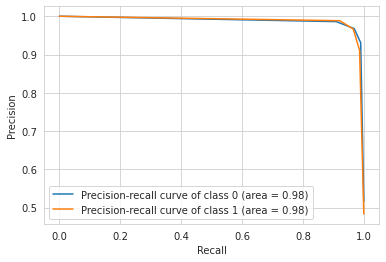

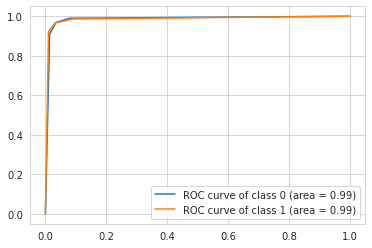

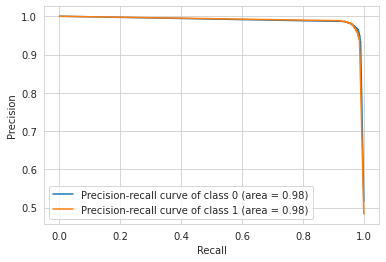

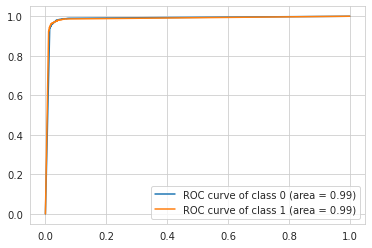

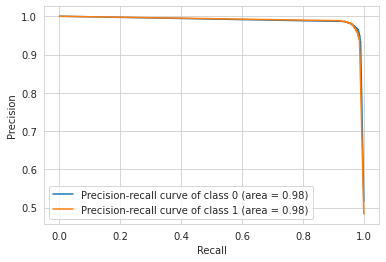

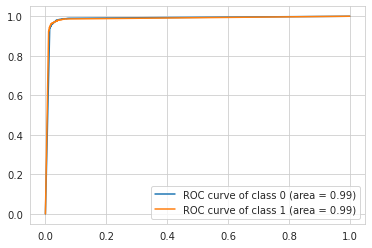

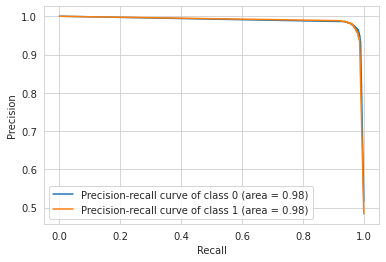

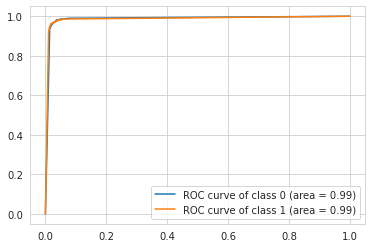

In [30]:
n_classes = 2
probs_names=["problr","probsvc","probsvcl","probsvcp","probsvcp2","probsvcs","probclf","probclfe","probKNNbt","probKNNkd","probKNNbrt","probKNNbtwd","probKNNkdwd","probKNNbrtwd"]

for i in range (len(probs_list)):
    print(probs_names[i])
    compute_precision_recall(probs_list[i])
    compute_ROC(probs_list[i])

probsvcp2
probclfe


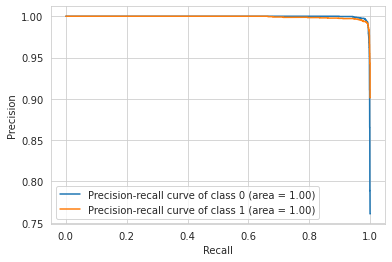

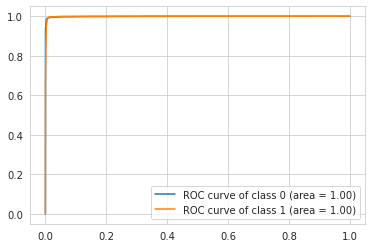

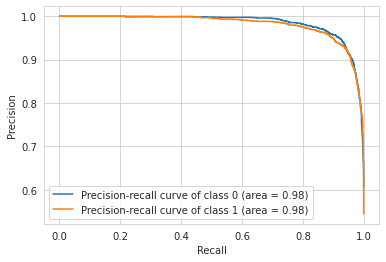

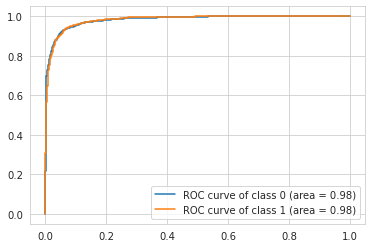

In [31]:
n_classes = 2
probs_names=["problr","probsvc","probsvcl","probsvcp","probsvcp2","probsvcs","probclf","probclfe","probKNNbt","probKNNkd","probKNNbrt","probKNNbtwd","probKNNkdwd","probKNNbrtwd"]
#probsvc, probsvcp, probsvcp2, probclf, probclfe1
#1,3,4,6,7
for i in [4,7]:
    print(probs_names[i])
    compute_precision_recall(probs_list[i])
    compute_ROC(probs_list[i])

Correct classification RFC etpy           0.5 % of the data:  0.9356624665903016
Correct classification RFC etpy           0.7 % of the data:  0.9336090783752253
Correct classification RFC etpy           0.8 % of the data:  0.9350938593700286


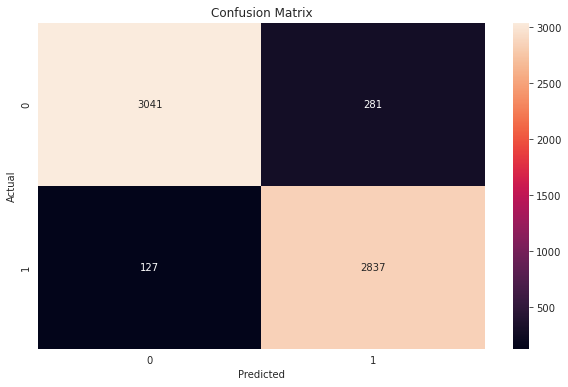

In [32]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X_train_convert_scaled,y_train, train_size=part)
    clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0,criterion="entropy") 
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy          ", part, "% of the data: ", clfe.score(x_v, y_v))
    if(part==0.8):
        visualize_confusion_matrix(clfe.predict(x_v), y_v)

# Crossvalidation

In [ ]:
x_t, x_v, y_t, y_v = train_test_split(X_train_convert_scaled,y_train, train_size=0.8)
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))

scores = cross_val_score(pipeline, X_train_convert_scaled,y_train, cv=50, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

In [ ]:
target_names = ['Fake', 'True']
print(classification_report(y_v, clfe.predict(x_v), target_names=target_names))

#### Apliquem PCA

In [ ]:
dataset_x = X_train_convert
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(dataset_x)
#pca = PCA(n_components = 0.95)
pca = PCA(n_components = 2)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)
#df = pd.DataFrame(reduced, columns = ['pc1','pc2','pc3','pc4','pc5'])
df = pd.DataFrame(reduced, columns = ['pc1','pc2'])
df['label']=train['label']
df.head()

In [ ]:
correlacio =df.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.25)
plt.show()

In [ ]:
X=X_train_convert_scaled
y=y_train

particions = [0.5, 0.7, 0.8]
apply_models(particions,X,y)

In [ ]:
names=X.columns
show_C_effect(X.values,y,names)

# Hyperparametres

#### Logistic

In [ ]:
x_t,x_v,y_t,y_v = train_test_split(X, y, test_size=0.2)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# define search space
model = LogisticRegression()
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] =   ['l2']
space['C'] = loguniform.rvs(1e-5, 100,size=100)
# define search
start_time = time.time()
clf =  GridSearchCV(model, space,  n_jobs=-1, cv=cv)
#Fit the model
best_model = clf.fit(x_t,y_t)
#Print The value of best Hyperparameters
print('Grid search')
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('R^2 at best_score:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] =   ['l2']
space['C'] = loguniform.rvs(1e-5, 100,size=10000)
start_time = time.time()
search = RandomizedSearchCV(model, space, n_iter=500, n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(x_t, y_t)
# summarize result
print('Random search')
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('R^2 at best_score:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

#### Random Forest

In [ ]:

# Number of trees in random forest
x_t,x_v,y_t,y_v = train_test_split(X, y, test_size=0.2)
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1100, num = 5)]
# Number of features to consider at every split
#max_features = ['sqrt', 'log2']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# Maximum number of levels in tree
max_depth =[5] #[int(x) for x in np.linspace(0, 10, 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
R_f=RandomForestClassifier()
start_time = time.time()
clf =GridSearchCV(R_f, random_grid,n_jobs=-1, cv=cv)
best_model = clf.fit(x_t,y_t)
print('Grid search')
print('Best number of estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])
print('R^2 at best_score:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1100, num = 1100)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# Maximum number of levels in tree
max_depth =[int(x) for x in np.linspace(1, 5, 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = list(range(2,11))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(1,5))
# Method of selecting samples for training each tree
bootstrap = [True, False]
start_time = time.time()
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
clf =  RandomizedSearchCV(R_f, random_grid, n_iter=80, n_jobs=-1, cv=cv)
#Fit the model
best_model = clf.fit(x_t,y_t)
#Print The value of best Hyperparameters
print('Random search')
print('Best number of estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])
print('R^2 at best_score:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))